In [91]:
import folium
import geopandas as gpd
import os
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import numpy as np
import matplotlib.pyplot as plt
import geojson
import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import MultiPolygon, Polygon

In [92]:
os.getcwd()

'C:\\Users\\amans\\OneDrive\\Desktop\\State of place'

Visualise the map with boundary

In [40]:
m = folium.Map([40.8, -74], zoom_start=11)
bounds = gpd.read_file(r'nybounds.geojson')
folium.GeoJson(bounds).add_to(m)
m

In [42]:
from shapely.geometry import MultiPolygon, Polygon

footprint = None
for i in bounds['geometry']:
    footprint = i

In [53]:
user = 'aman_sop' 
password = 'abcd1234'

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')
#footprint = geojson_to_wkt(read_geojson(bounds))

print (footprint)

LINESTRING (-73.92459869384766 40.87666059992976, -73.9105224609375 40.87432421954122, -73.88442993164063 40.86627605595889, -73.817138671875 40.85173495823773, -73.81473541259766 40.83199550584334, -73.8006591796875 40.81796653313175, -73.80409240722655 40.81251002009193, -73.82846832275391 40.8104312304102, -73.83567810058594 40.80523397126979, -73.84117126464844 40.81952545442639, -73.84597778320313 40.81095093393647, -73.84872436523438 40.80601358609009, -73.85936737060547 40.80549384389415, -73.87378692626952 40.80185553455111, -73.89507293701172 40.80809251416925, -73.91326904296874 40.79431840216349, -73.92562866210938 40.78184126814031, -73.95652770996094 40.76208101161184, -73.97472381591797 40.73581157695217, -73.97678375244141 40.71343536379427, -74.01180267333984 40.70172388214517, -74.01695251464844 40.70432661161239, -74.01351928710938 40.72358364851732, -74.00871276855469 40.75219867966512, -73.95206451416014 40.83329433468369, -73.92665863037109 40.8764010061807)


In [44]:
products = api.query(footprint,
                     date = ('20200609', '20200610'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

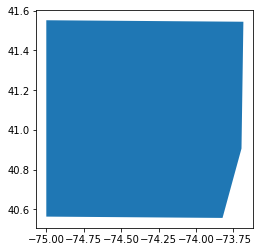

In [45]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

b8b7d14f-7b23-4661-83e5-adcc17d9bf83    Annotation(-74.3569, 41.0611, 'b8b7d14f-7b23-4...
dtype: object

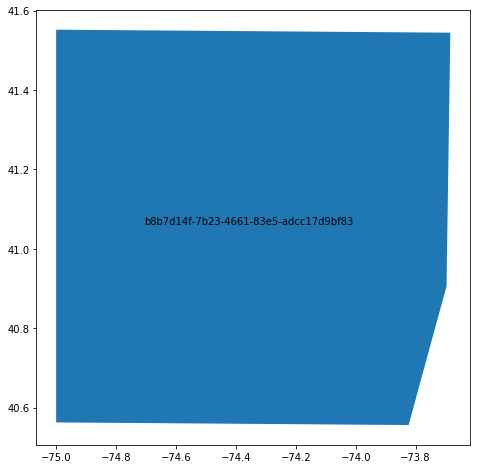

In [54]:
ax = areas.plot(column='uuid', cmap=None, figsize=(8,8))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [55]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

C:\Users\amans\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry
b8b7d14f-7b23-4661-83e5-adcc17d9bf83,S2A_MSIL2A_20200609T154911_N0214_R054_T18TWL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-09T15:49:11.024Z, Instrument: MS...",2020-06-09 15:49:11.024,2020-06-09 15:49:11.024,2020-06-10 01:19:26.504,25934,54,...,1.11 GB,GS2A_20200609T154911_025934_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200609T154911_N0214_R054_T18TWL_2...,b8b7d14f-7b23-4661-83e5-adcc17d9bf83,"MULTIPOLYGON (((-73.82303 40.55614, -73.80422 ..."


In [126]:
api.download('b8b7d14f-7b23-4661-83e5-adcc17d9bf83')

Downloading: 100%|████████████████████████████████████████████████████████████████| 1.19G/1.19G [17:24<00:00, 1.15MB/s]
MD5 checksumming: 100%|███████████████████████████████████████████████████████████| 1.19G/1.19G [00:18<00:00, 65.2MB/s]


{'id': 'b8b7d14f-7b23-4661-83e5-adcc17d9bf83',
 'title': 'S2A_MSIL2A_20200609T154911_N0214_R054_T18TWL_20200609T201659',
 'size': 1188684154,
 'md5': '41E92553BD2E25DED8188F668923573A',
 'date': datetime.datetime(2020, 6, 9, 15, 49, 11, 24000),
 'footprint': 'POLYGON((-73.69643392299747 40.90569382941853,-73.69834274241987 40.900438749076,-73.75140629973073 40.75436506941089,-73.80421508850195 40.608223359175554,-73.82303093989755 40.55614460129639,-75.00023625343321 40.56274991351036,-75.00023981916341 41.551844670066835,-73.68379957458711 41.54431153543986,-73.69643392299747 40.90569382941853))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('b8b7d14f-7b23-4661-83e5-adcc17d9bf83')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 6, 10, 1, 20, 9, 937000),
 'Ingestion Date': datetime.datetime(2020, 6, 10, 1, 19, 26, 504000),
 'path': '.\\S2A_MSIL2A_20200609T154911_N0214_R054_T18TWL_20200609T201659.zip',
 'downloaded_bytes': 1188684154}

In [56]:
R10 = r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\GRANULE\L2A_T18TWL_A025934_20200609T155403\IMG_DATA\R10m'
b2 = rasterio.open(R10+ '\T18TWL_20200609T154911_B02_10m.jp2') #blue
b3 = rasterio.open(R10+ '\T18TWL_20200609T154911_B03_10m.jp2') #green
b4 = rasterio.open(R10+ '\T18TWL_20200609T154911_B04_10m.jp2') #red
b8 = rasterio.open(R10+ '\T18TWL_20200609T154911_B08_10m.jp2') #nir

In [49]:
b4.read(1)

array([[ 267,  254,  211, ..., 1172, 1192, 1232],
       [ 197,  218,  232, ..., 1188, 1196, 1218],
       [ 184,  208,  244, ..., 1194, 1202, 1198],
       ...,
       [ 274,  269,  266, ...,    0,    0,    0],
       [ 386,  422,  418, ...,    0,    0,    0],
       [ 477,  497,  490, ...,    0,    0,    0]], dtype=uint16)

In [125]:
bounds.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
with rasterio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [126]:
bounds_proj = bounds.to_crs({'init': 'epsg:2955'})

with rasterio.open("RGB.tiff") as src:
    out_image, out_transform = mask(src, bounds_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("NY_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

ValueError: Input shapes do not overlap raster.

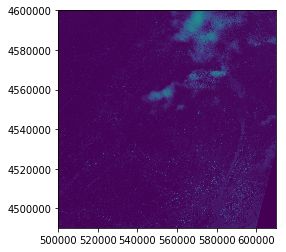

In [58]:
src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\RGB.tiff', count=3)
plot.show(src)

In [21]:
trueColor = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\Output\SentinelTrueColor2.tiff','w',driver='Gtiff',
                         width=b4.width, height=b4.height,
                         count=3,
                         crs=b4.crs,
                         transform=b4.transform,
                         dtype=b4.dtypes[0]
                         )
trueColor.write(b2.read(1),3) #blue
trueColor.write(b3.read(1),2) #green
trueColor.write(b4.read(1),1) #red
trueColor.close()

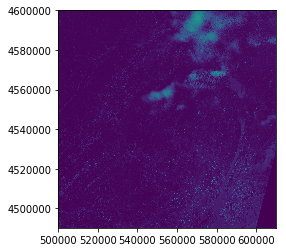

In [23]:
src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\Output\SentinelTrueColor2.tiff', count=3)
plot.show(src)

In [25]:
#export false color image
falseColor = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\Output\SentinelFalseColor.tiff', 'w', driver='Gtiff',
                          width=b2.width, height=b2.height,
                          count=3,
                          crs=b2.crs,
                          transform=b2.transform,
                          dtype='uint16'                   
                         )
falseColor.write(b3.read(1),3) #Blue
falseColor.write(b4.read(1),2) #Green
falseColor.write(b8.read(1),1) #Red
falseColor.close()

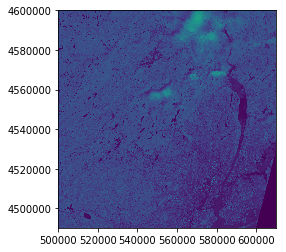

In [27]:
src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\Output\SentinelFalseColor.tiff', count=3)
plot.show(src)

In [ ]:
user = 'aman_sop' 
password = 'abcd1234'

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [90]:
m = folium.Map([34, -118.2], zoom_start=10)
labounds = gpd.read_file(r'C:\Users\amans\OneDrive\Desktop\State of place\layers\POLYGON.shp')
folium.GeoJson(labounds).add_to(m)
m

In [93]:
footprint = None
for i in labounds['geometry']:
    footprint = i

In [97]:
products = api.query(footprint,
                     date = ('20190601', '20190726'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,20)
                    )

In [100]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['uuid'], ascending=[True])
products_gdf_sorted

C:\Users\amans\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
305fb15f-3fa1-42de-8e6d-3dda8635e698,S2B_MSIL2A_20190628T182929_N0212_R027_T11SLT_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-28T18:29:29.024Z, Instrument: MS...",2019-06-28 18:29:29.024,2019-06-28 18:29:29.024,2019-06-29 11:29:13.869,12065,27,...,02.12,Level-2A,S2MSI2A,Sentinel-2,1.02 GB,S2B_MSIL2A_20190628T182929_N0212_R027_T11SLT_2...,S2B_OPER_MSI_L1C_TL_SGS__20190628T220037_A0120...,S2B_MSIL2A_20190628T182929_N0212_R027_T11SLT_2...,305fb15f-3fa1-42de-8e6d-3dda8635e698,"MULTIPOLYGON (((-119.14887 33.33277, -117.9693..."


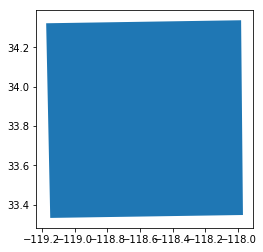

In [98]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

305fb15f-3fa1-42de-8e6d-3dda8635e698    Annotation(-118.568, 33.8361, '305fb15f-3fa1-4...
dtype: object

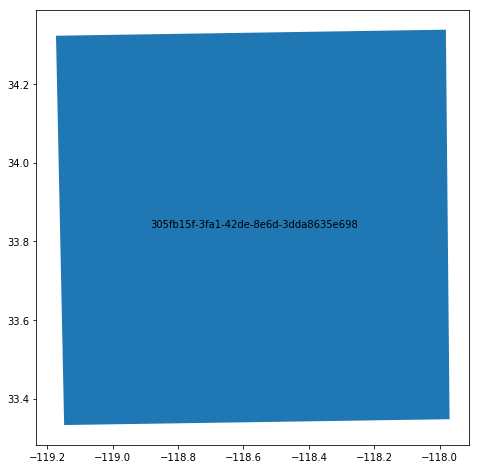

In [99]:
ax = areas.plot(column='uuid', cmap=None, figsize=(8,8))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [101]:
api.download('305fb15f-3fa1-42de-8e6d-3dda8635e698')

Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.09G/1.09G [21:18<00:00, 724kB/s]
MD5 checksumming: 100%|████████████████████████████████████████████████████████████| 1.09G/1.09G [00:03<00:00, 315MB/s]


{'id': '305fb15f-3fa1-42de-8e6d-3dda8635e698',
 'title': 'S2B_MSIL2A_20190628T182929_N0212_R027_T11SLT_20190628T222303',
 'size': 1092181482,
 'md5': '02DA4AE086EEB0D864105225EF150746',
 'date': datetime.datetime(2019, 6, 28, 18, 29, 29, 24000),
 'footprint': 'POLYGON((-119.17378 34.3223655300343,-117.98062 34.3377366079947,-117.969376 33.347577738129736,-119.148865 33.3327671075422,-119.17378 34.3223655300343))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('305fb15f-3fa1-42de-8e6d-3dda8635e698')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 6, 29, 11, 30, 28, 165000),
 'Ingestion Date': datetime.datetime(2019, 6, 29, 11, 29, 13, 869000),
 'path': '.\\S2B_MSIL2A_20190628T182929_N0212_R027_T11SLT_20190628T222303.zip',
 'downloaded_bytes': 1092181482}

In [110]:
labounds.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [132]:
R10 = r'C:\Users\amans\OneDrive\Desktop\State of place\Los angeles\GRANULE\L2A_T11SLT_A012065_20190628T184456\IMG_DATA\R10m'
b4 = rasterio.open(R10+'/T11SLT_20190628T182929_B04_10m.jp2')
b3 = rasterio.open(R10+'/T11SLT_20190628T182929_B03_10m.jp2')
b2 = rasterio.open(R10+'/T11SLT_20190628T182929_B02_10m.jp2')
b8 = rasterio.open(R10+'/T11SLT_20190628T182929_B08_10m.jp2')


# Create an RGB image 
with rasterio.open('LA.tiff','w',driver='Gtiff', width=b2.width, height=b2.height, 
              count=3,crs=b2.crs,transform=b2.transform, dtype=b2.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3)
    rgb.write(b8.read(1),3)
    rgb.close()

In [133]:
la_proj = labounds.to_crs({'init': 'epsg:2955'})

with rasterio.open("LA.tiff") as src:
    out_image, out_transform = rasterio.mask.mask(src, la_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("LA_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

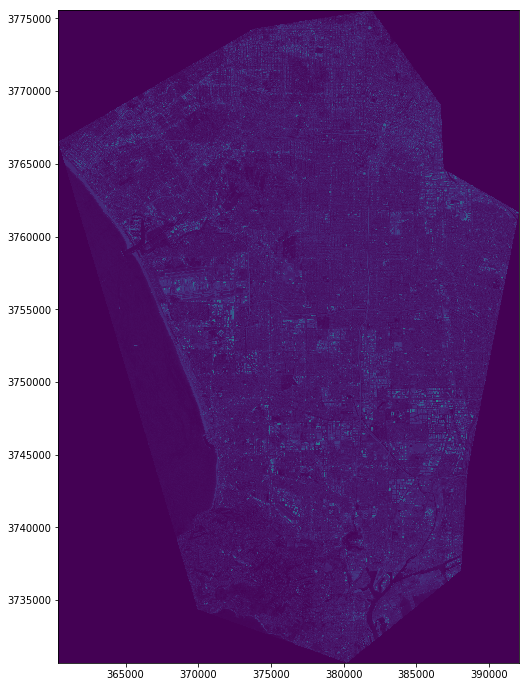

In [147]:
src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\LA_masked.tif')
plt.figure(figsize=(12,12))
plot.show(src, adjust='linear')

In [146]:
src.shape

(4486, 3166)

In [150]:
from osgeo import gdal

ds = gdal.Open(r'C:\Users\amans\OneDrive\Desktop\State of place\LA_masked.tif', gdal.GA_ReadOnly)
img_gdal = ds.GetRasterBand(1).ReadAsArray()

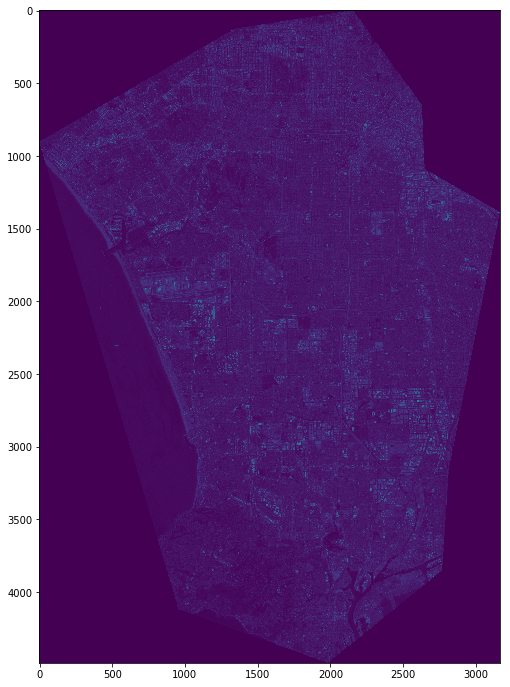

In [161]:
plt.figure(figsize=(12,12))
#plt.xlim(1600, 1800)
#plt.ylim(1600, 1800)
plt.imshow(img_gdal)

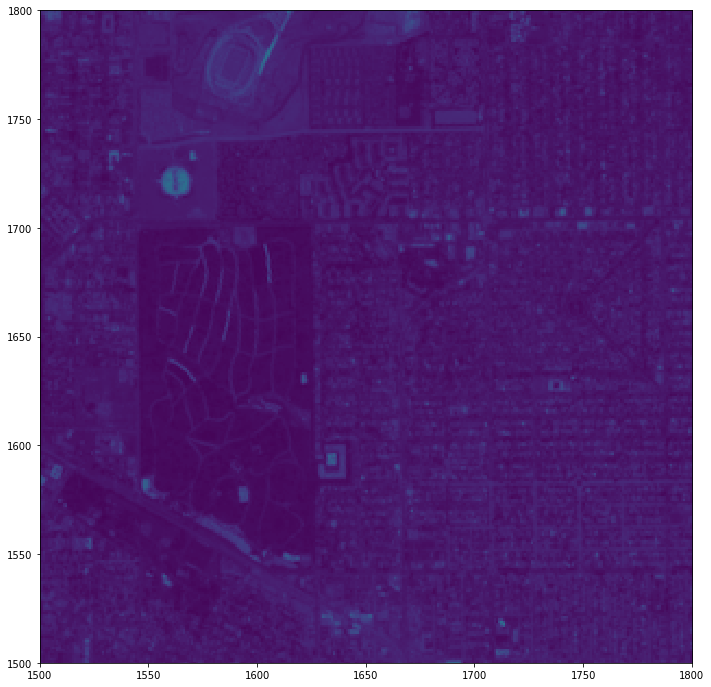

In [160]:
plt.figure(figsize=(12,12))
plt.xlim(1500, 1800)
plt.ylim(1500, 1800)
plt.imshow(img_gdal)